**Task 1**

Sample mean (used for centering): [ 5.02931454 10.01984902  1.97725162]

Sample covariance matrix:
 [[3.19597399 2.00921675 2.15357318]
 [2.00921675 9.29178652 1.03072053]
 [2.15357318 1.03072053 2.04954987]]

Eigenvalues (descending):
 [10.2264832   3.93783545  0.37299172]

Eigenvectors (columns correspond to eigenvectors, descending order):
 [[-0.3258802   0.70594351  0.62884486]
 [-0.9235264  -0.37999209 -0.05200967]
 [-0.20224018  0.59770375 -0.77578937]]


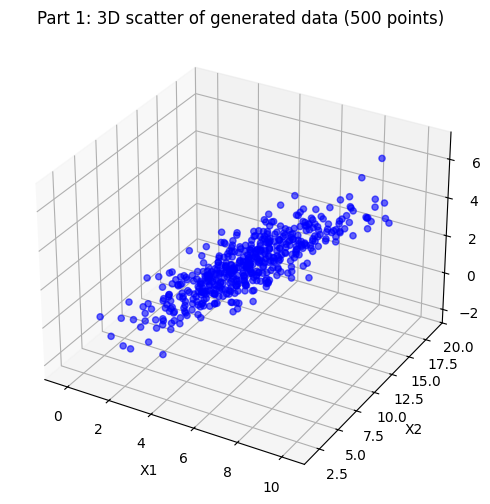

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

mean = np.array([5, 10, 2])
cov = np.array([[3, 2, 2],
                [2, 10, 1],
                [2, 1, 2]])

X = np.random.multivariate_normal(mean, cov, size=500)

X_mean = X.mean(axis=0)
X_centered = X - X_mean

cov_sample = (X_centered.T @ X_centered) / (X.shape[0] - 1)

eigvals, eigvecs = np.linalg.eigh(cov_sample)
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

print("Sample mean (used for centering):", X_mean)
print("\nSample covariance matrix:\n", cov_sample)
print("\nEigenvalues (descending):\n", eigvals_sorted)
print("\nEigenvectors (columns correspond to eigenvectors, descending order):\n", eigvecs_sorted)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=20, c='blue', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Part 1: 3D scatter of generated data (500 points)')
plt.show()

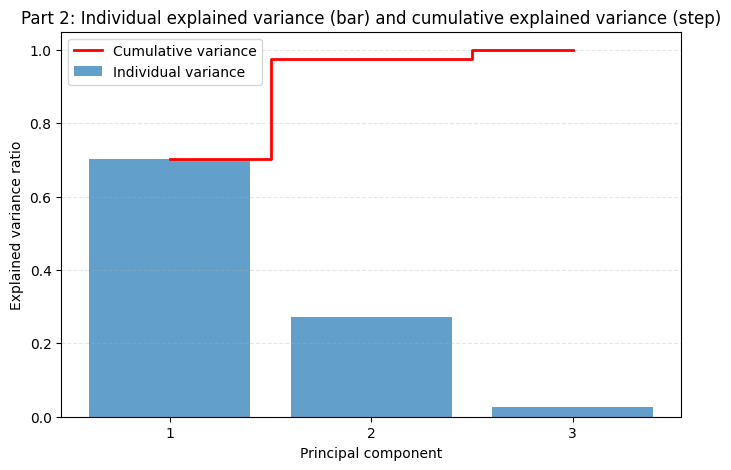

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
mean = np.array([5, 10, 2])
cov = np.array([[3, 2, 2],
                [2, 10, 1],
                [2, 1, 2]])
X = np.random.multivariate_normal(mean, cov, size=500)

X_centered = X - X.mean(axis=0)
cov_sample = (X_centered.T @ X_centered) / (X.shape[0] - 1)
eigvals, eigvecs = np.linalg.eigh(cov_sample)
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]

explained_variance_ratio = eigvals_sorted / np.sum(eigvals_sorted)
cumulative_explained = np.cumsum(explained_variance_ratio)

components = np.arange(1, len(eigvals_sorted) + 1)

plt.figure(figsize=(8,5))
plt.bar(components, explained_variance_ratio, alpha=0.7, label='Individual variance')
plt.step(components, cumulative_explained, where='mid', linewidth=2, color='red', label='Cumulative variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.xticks(components)
plt.title('Part 2: Individual explained variance (bar) and cumulative explained variance (step)')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Detected anomalies on PC3 (contamination=0.1): 50 points (threshold=1.0243)


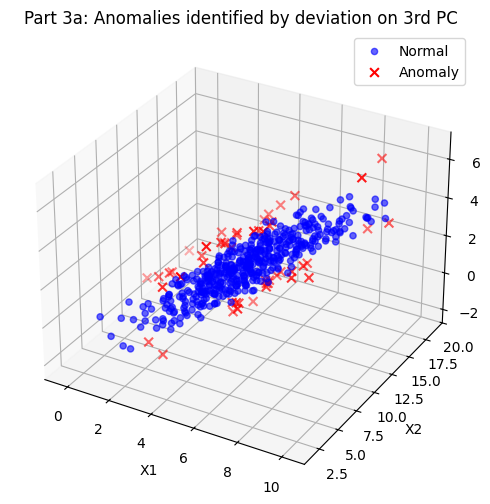

Detected anomalies on PC2 (contamination=0.1): 50 points (threshold=3.2103)


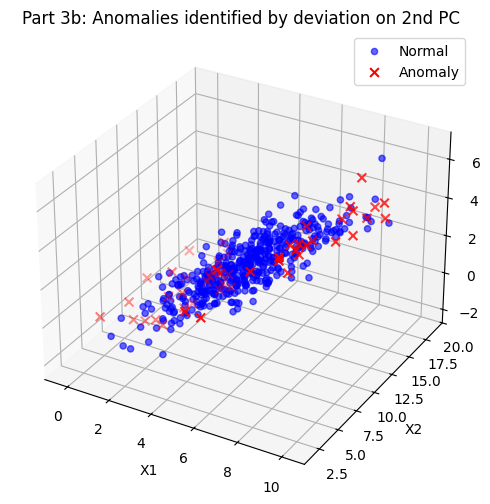

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
mean = np.array([5, 10, 2])
cov = np.array([[3, 2, 2],
                [2, 10, 1],
                [2, 1, 2]])
X = np.random.multivariate_normal(mean, cov, size=500)

X_centered = X - X.mean(axis=0)
cov_sample = (X_centered.T @ X_centered) / (X.shape[0] - 1)
eigvals, eigvecs = np.linalg.eigh(cov_sample)
idx = np.argsort(eigvals)[::-1]
eigvecs_sorted = eigvecs[:, idx]
eigvals_sorted = eigvals[idx]

scores = X_centered @ eigvecs_sorted

pc_index = 2
pc_values = scores[:, pc_index]
deviations = np.abs(pc_values - pc_values.mean())

contamination = 0.1
threshold = np.quantile(deviations, 1 - contamination)

labels = (deviations > threshold).astype(int)
n_anom = labels.sum()
print(f"Detected anomalies on PC3 (contamination={contamination}): {n_anom} points (threshold={threshold:.4f})")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
normal_mask = labels == 0
anom_mask = labels == 1
ax.scatter(X[normal_mask,0], X[normal_mask,1], X[normal_mask,2], s=20, c='blue', alpha=0.6, label='Normal')
ax.scatter(X[anom_mask,0], X[anom_mask,1], X[anom_mask,2], s=40, c='red', marker='x', label='Anomaly')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Part 3a: Anomalies identified by deviation on 3rd PC')
ax.legend()
plt.show()


pc_index = 1
pc_values = scores[:, pc_index]
deviations = np.abs(pc_values - pc_values.mean())
threshold = np.quantile(deviations, 1 - contamination)
labels = (deviations > threshold).astype(int)
n_anom = labels.sum()
print(f"Detected anomalies on PC2 (contamination={contamination}): {n_anom} points (threshold={threshold:.4f})")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
normal_mask = labels == 0
anom_mask = labels == 1
ax.scatter(X[normal_mask,0], X[normal_mask,1], X[normal_mask,2], s=20, c='blue', alpha=0.6, label='Normal')
ax.scatter(X[anom_mask,0], X[anom_mask,1], X[anom_mask,2], s=40, c='red', marker='x', label='Anomaly')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Part 3b: Anomalies identified by deviation on 2nd PC')
ax.legend()
plt.show()

Detected anomalies by normalized-dist across all PCs (contamination=0.1): 50 points (threshold=2.5537)


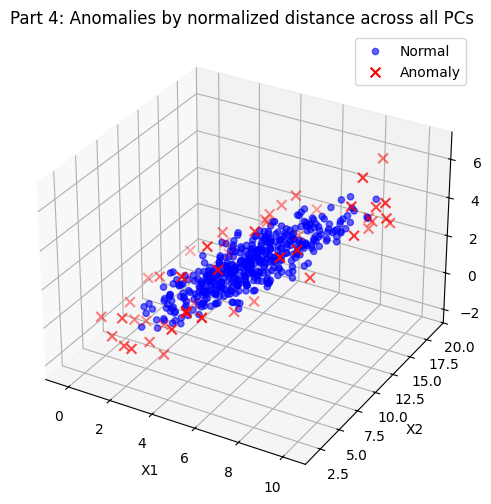

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
mean = np.array([5, 10, 2])
cov = np.array([[3, 2, 2],
                [2, 10, 1],
                [2, 1, 2]])
X = np.random.multivariate_normal(mean, cov, size=500)

X_centered = X - X.mean(axis=0)
cov_sample = (X_centered.T @ X_centered) / (X.shape[0] - 1)
eigvals, eigvecs = np.linalg.eigh(cov_sample)
idx = np.argsort(eigvals)[::-1]
eigvecs_sorted = eigvecs[:, idx]

scores = X_centered @ eigvecs_sorted

means_pc = scores.mean(axis=0)
stds_pc = scores.std(axis=0, ddof=1)

stds_pc[stds_pc == 0] = 1e-12

z_scores = (scores - means_pc) / stds_pc
normalized_dist = np.sqrt(np.sum(z_scores ** 2, axis=1))

contamination = 0.1
threshold = np.quantile(normalized_dist, 1 - contamination)
labels = (normalized_dist > threshold).astype(int)
n_anom = labels.sum()
print(f"Detected anomalies by normalized-dist across all PCs (contamination={contamination}): {n_anom} points (threshold={threshold:.4f})")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
normal_mask = labels == 0
anom_mask = labels == 1
ax.scatter(X[normal_mask,0], X[normal_mask,1], X[normal_mask,2], s=20, c='blue', alpha=0.6, label='Normal')
ax.scatter(X[anom_mask,0], X[anom_mask,1], X[anom_mask,2], s=50, c='red', marker='x', label='Anomaly')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Part 4: Anomalies by normalized distance across all PCs')
ax.legend()
plt.show()

**Task 2**

In [2]:
%pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 11.4 MB/s eta 0:00:00


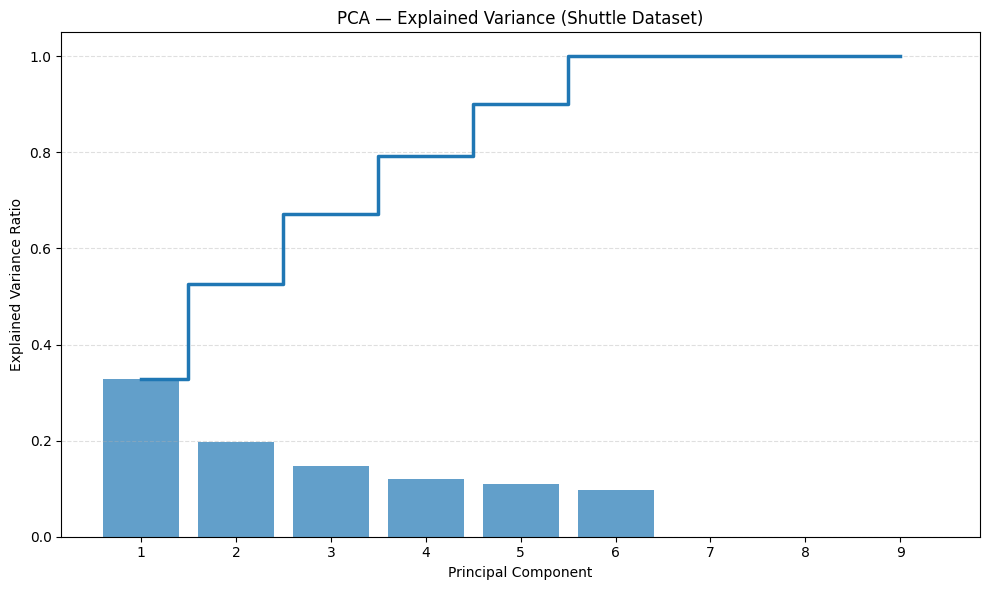

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from pyod.models.pca import PCA
from pyod.models.kpca import KPCA

data = loadmat("shuttle.mat")
X = data['X']
y_original = data['y'].ravel()

unique_orig, counts_orig = np.unique(y_original, return_counts=True)

y = (y_original != 1).astype(int)

unique, counts = np.unique(y, return_counts=True)

if y.mean() > 0.5:
    y = 1 - y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

cont_train = y_train.mean()
if cont_train > 0.5:
    raise ValueError(f"Contamination rate {cont_train:.4f} is > 0.5!")
if cont_train <= 0:
    cont_train = 0.01
elif cont_train >= 0.5:
    cont_train = 0.49

model_pca = PCA(contamination=cont_train, random_state=42)
model_pca.fit(X_train_std)

if hasattr(model_pca, 'explained_variance_'):
    expl_var = model_pca.explained_variance_
    expl_var_ratio = expl_var / expl_var.sum()
    cum_var = np.cumsum(expl_var_ratio)
    components = np.arange(1, len(expl_var) + 1)
    plt.figure(figsize=(10,6))
    plt.bar(components, expl_var_ratio, alpha=0.7)
    plt.step(components, cum_var, where='mid', linewidth=2.5)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA — Explained Variance (Shuttle Dataset)")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.xticks(components)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

y_train_pred_pca = model_pca.labels_
y_test_pred_pca = model_pca.predict(X_test_std)

max_samples_kpca = 5000
if len(X_train_std) > max_samples_kpca:
    X_train_kpca, _, y_train_kpca, _ = train_test_split(
        X_train_std, y_train,
        train_size=max_samples_kpca,
        random_state=42,
        stratify=y_train
    )
    cont_train_kpca = y_train_kpca.mean()
    if cont_train_kpca <= 0:
        cont_train_kpca = 0.01
    elif cont_train_kpca >= 0.5:
        cont_train_kpca = 0.49
else:
    X_train_kpca = X_train_std
    y_train_kpca = y_train
    cont_train_kpca = cont_train

n_features = X_train_kpca.shape[1]
gamma = 1.0 / (n_features * X_train_kpca.var())

try:
    model_kpca = KPCA(
        contamination=cont_train_kpca,
        kernel="rbf",
        n_components=5,
        gamma=gamma,
        random_state=42
    )
    model_kpca.fit(X_train_kpca)
    y_train_kpca_pred = model_kpca.predict(X_train_kpca)
    y_test_pred_kpca = model_kpca.predict(X_test_std)

except MemoryError as e:
    print("KPCA memory error:", e)
except Exception as e:
    print("KPCA error:", e)

**Task 3**

In [1]:
%pip install tensorflow

Dataset shape: (49097, 9)
Contamination rate: 0.9285
Train contamination rate: 0.9285
Test contamination rate: 0.9285
Data shapes - Train: (24548, 9), Test: (24549, 9)

Autoencoder Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (1, 5)                 │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 8)                 │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 9)                 │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)


Training autoencoder...
Epoch 1/100
24/24 - 2s - 96ms/step - loss: 0.0383 - val_loss: 0.0329
Epoch 2/100
24/24 - 0s - 8ms/step - loss: 0.0313 - val_loss: 0.0299
Epoch 3/100
24/24 - 0s - 8ms/step - loss: 0.0285 - val_loss: 0.0270
Epoch 4/100
24/24 - 0s - 7ms/step - loss: 0.0256 - val_loss: 0.0241
Epoch 5/100
24/24 - 0s - 8ms/step - loss: 0.0225 - val_loss: 0.0210
Epoch 6/100
24/24 - 0s - 8ms/step - loss: 0.0195 - val_loss: 0.0180
Epoch 7/100
24/24 - 0s - 7ms/step - loss: 0.0167 - val_loss: 0.0153
Epoch 8/100
24/24 - 0s - 7ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 9/100
24/24 - 0s - 9ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 10/100
24/24 - 0s - 8ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 11/100
24/24 - 0s - 7ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 12/100
24/24 - 0s - 8ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 13/100
24/24 - 0s - 8ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 14/100
24/24 - 0s - 8ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 15/100
24/2

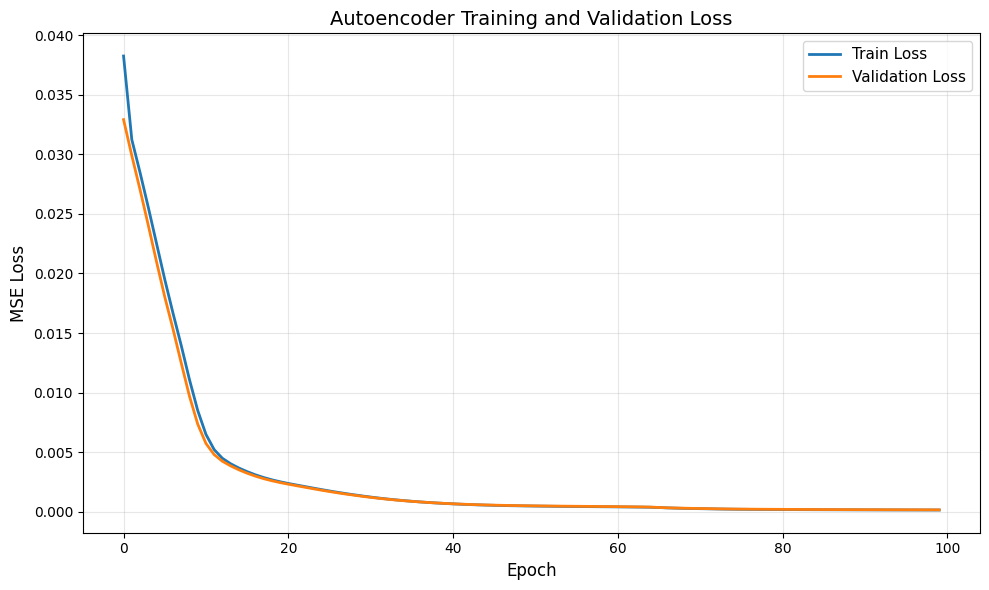


Computing reconstruction errors...
Contamination rate used for threshold: 0.9285
Threshold for anomaly detection: 0.000009

RESULTS - Autoencoder Anomaly Detection
Balanced Accuracy — Training: 0.4618
Balanced Accuracy — Testing : 0.4626


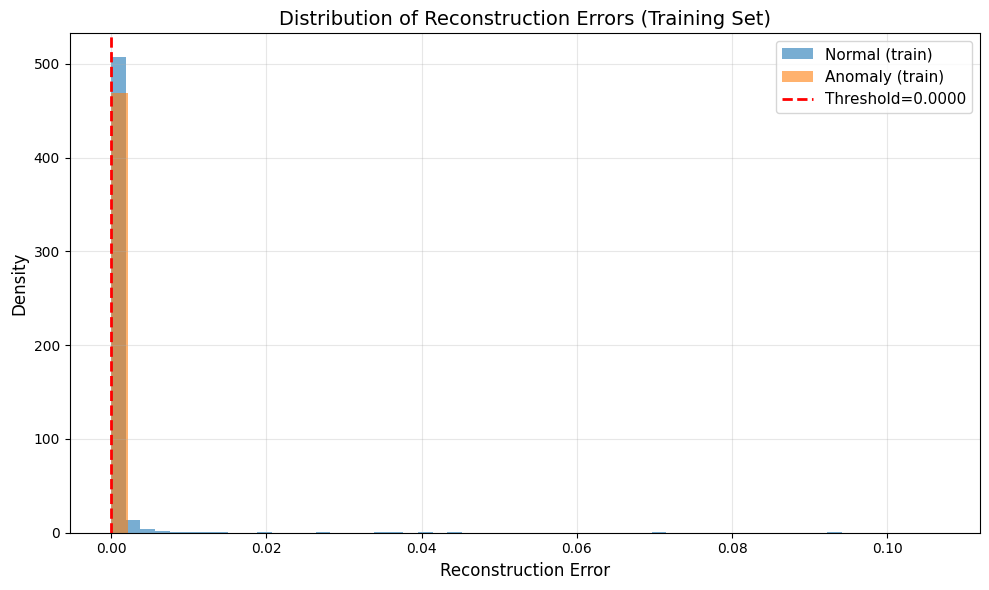

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential

np.random.seed(42)
tf.random.set_seed(42)

data = loadmat("shuttle.mat")
X = data['X']
y = data['y'].ravel()

y = (y != 1).astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Contamination rate: {y.mean():.4f}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print(f"Train contamination rate: {y_train.mean():.4f}")
print(f"Test contamination rate: {y_test.mean():.4f}")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data shapes - Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")

class Autoencoder(Model):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()

        self.encoder = Sequential([
            layers.Dense(8, activation='relu', input_shape=(input_dim,)),
            layers.Dense(5, activation='relu'),
            layers.Dense(3, activation='relu')
        ], name='encoder')

        self.decoder = Sequential([
            layers.Dense(5, activation='relu'),
            layers.Dense(8, activation='relu'),
            layers.Dense(input_dim, activation='sigmoid')
        ], name='decoder')

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = X_train_scaled.shape[1]
autoencoder = Autoencoder(input_dim)

_ = autoencoder(X_train_scaled[:1])

print("\nAutoencoder Architecture:")
autoencoder.encoder.summary()
autoencoder.decoder.summary()

autoencoder.compile(optimizer='adam', loss='mse')

print("\nTraining autoencoder...")
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=100,
    batch_size=1024,
    validation_data=(X_test_scaled, X_test_scaled),
    verbose=2
)

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Autoencoder Training and Validation Loss', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nComputing reconstruction errors...")

X_train_pred = autoencoder.predict(X_train_scaled, verbose=0)
X_test_pred = autoencoder.predict(X_test_scaled, verbose=0)

recon_error_train = np.mean((X_train_scaled - X_train_pred)**2, axis=1)
recon_error_test  = np.mean((X_test_scaled - X_test_pred)**2, axis=1)

contamination = y_train.mean()
print(f"Contamination rate used for threshold: {contamination:.4f}")

if contamination <= 0:
    contamination = 0.01
    print(f"Warning: Adjusted contamination to {contamination}")
elif contamination >= 1:
    contamination = 0.99
    print(f"Warning: Adjusted contamination to {contamination}")

threshold = np.quantile(recon_error_train, 1 - contamination)
print(f"Threshold for anomaly detection: {threshold:.6f}")

y_train_pred_ae = (recon_error_train > threshold).astype(int)
y_test_pred_ae  = (recon_error_test > threshold).astype(int)

bal_acc_train = balanced_accuracy_score(y_train, y_train_pred_ae)
bal_acc_test  = balanced_accuracy_score(y_test, y_test_pred_ae)

print("\n" + "="*60)
print("RESULTS - Autoencoder Anomaly Detection")
print("="*60)
print(f"Balanced Accuracy — Training: {bal_acc_train:.4f}")
print(f"Balanced Accuracy — Testing : {bal_acc_test:.4f}")
print("="*60)

plt.figure(figsize=(10,6))
plt.hist(recon_error_train[y_train==0], bins=50, alpha=0.6, label='Normal (train)', density=True)
plt.hist(recon_error_train[y_train==1], bins=50, alpha=0.6, label='Anomaly (train)', density=True)
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold={threshold:.4f}')
plt.xlabel('Reconstruction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Reconstruction Errors (Training Set)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Task 4**

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)
Noisy train shape: (60000, 28, 28, 1)
Noisy test shape: (10000, 28, 28, 1)

=== Training Standard Autoencoder ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Encoder architecture:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 4)        │           292 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372 (1.45 KB)

 Trainable params: 372 (1.45 KB)

 Non-trainable params: 0 (0.00 B)


Decoder architecture:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (1, 14, 14, 4)         │           148 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (1, 28, 28, 8)         │           296 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 28, 28, 1)         │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517 (2.02 KB)

 Trainable params: 517 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 - 35s - 38ms/step - loss: 0.0378 - val_loss: 0.0099
Epoch 2/10
938/938 - 30s - 32ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 3/10
938/938 - 31s - 33ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 4/10
938/938 - 32s - 34ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 5/10
938/938 - 32s - 34ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 6/10
938/938 - 31s - 33ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 7/10
938/938 - 39s - 41ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/10
938/938 - 29s - 31ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 9/10
938/938 - 31s - 33ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/10
938/938 - 41s - 44ms/step - loss: 0.0035 - val_loss: 0.0034


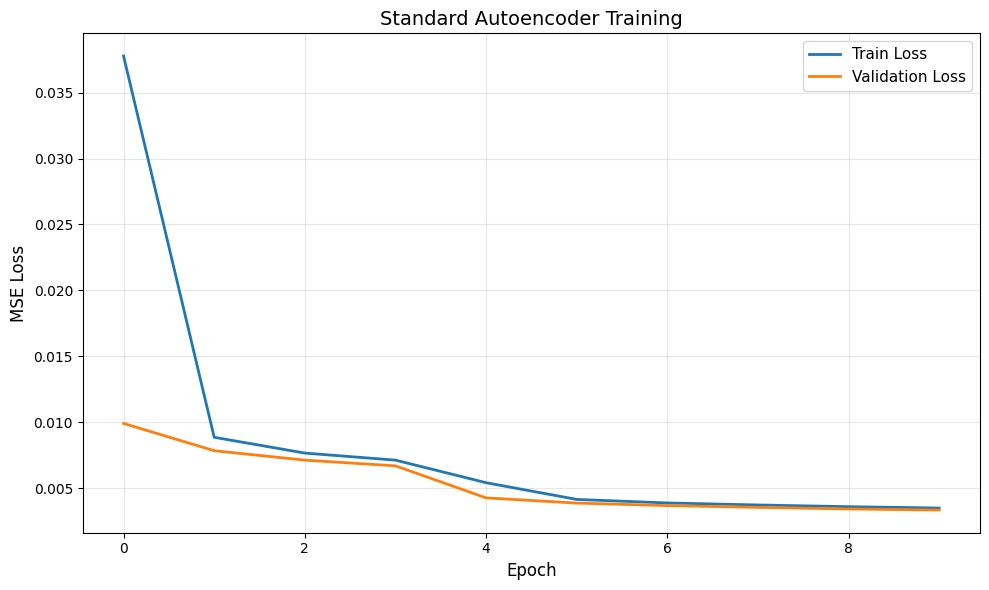


=== Computing Reconstruction Errors ===
Training reconstruction error - Mean: 0.003464, Std: 0.001836
Threshold for anomaly detection: 0.005300
Clean test reconstruction error - Mean: 0.003355
Noisy test reconstruction error - Mean: 0.052619

=== Standard Autoencoder Results ===
Accuracy on original test images (should be normal): 0.8803
Accuracy on noisy test images (should be anomalies): 1.0000
Overall accuracy: 0.9402


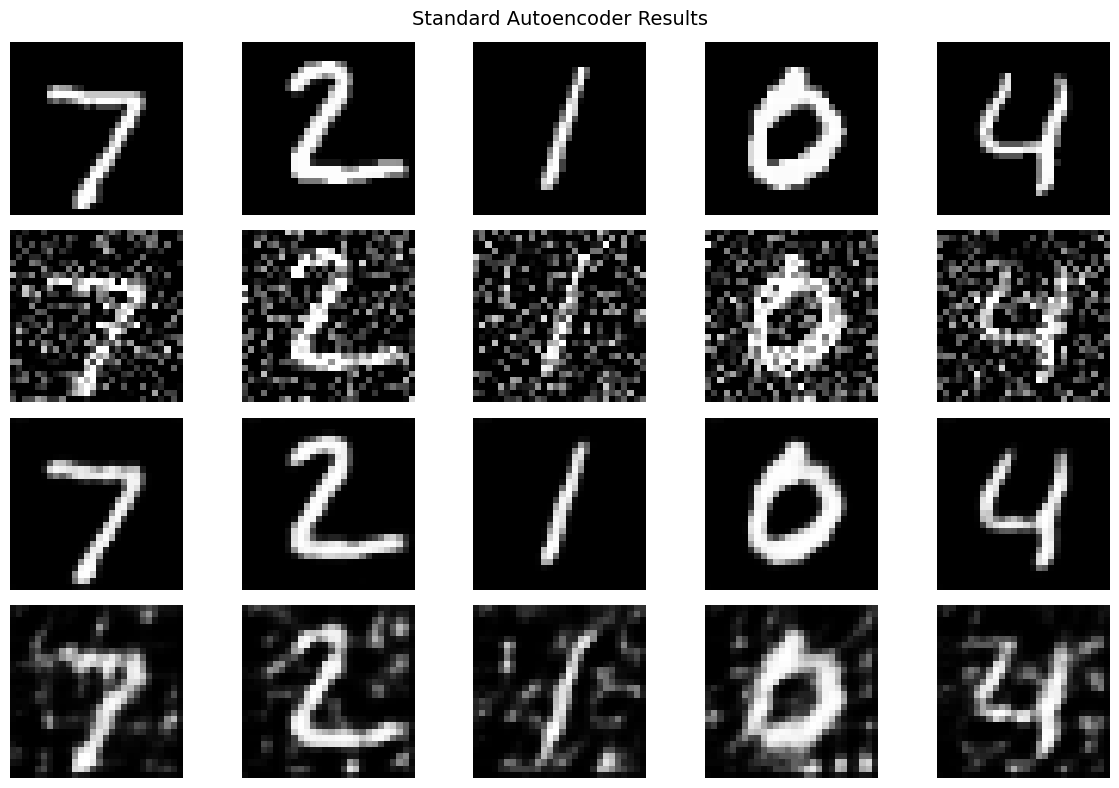


=== Training Denoising Autoencoder ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 - 33s - 35ms/step - loss: 0.0420 - val_loss: 0.0116
Epoch 2/10
938/938 - 30s - 32ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 3/10
938/938 - 32s - 35ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 4/10
938/938 - 31s - 33ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 5/10
938/938 - 31s - 33ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 6/10
938/938 - 30s - 32ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 7/10
938/938 - 30s - 32ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/10
938/938 - 31s - 33ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 9/10
938/938 - 31s - 33ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/10
938/938 - 40s - 43ms/step - loss: 0.0093 - val_loss: 0.0092


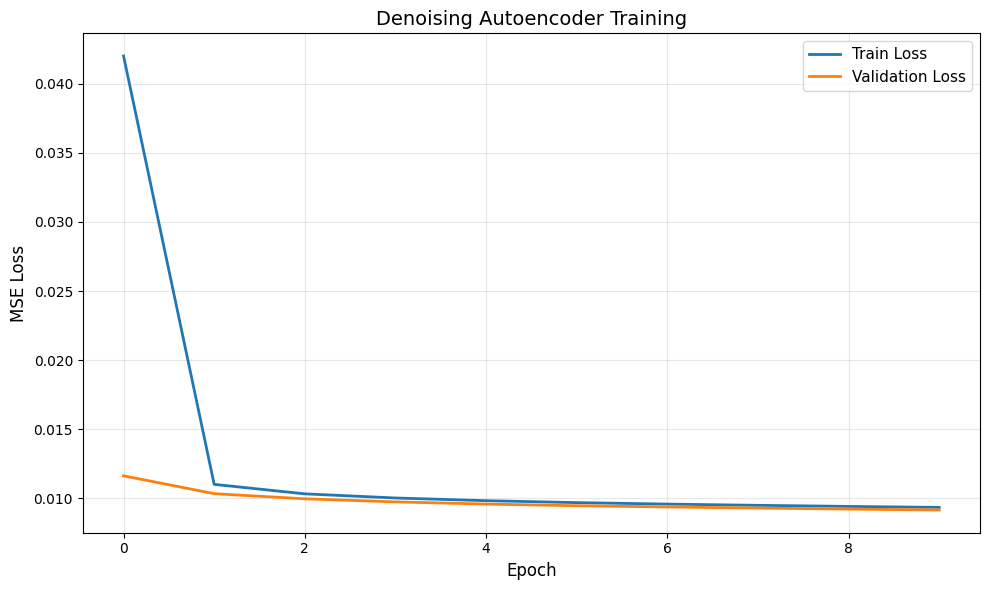

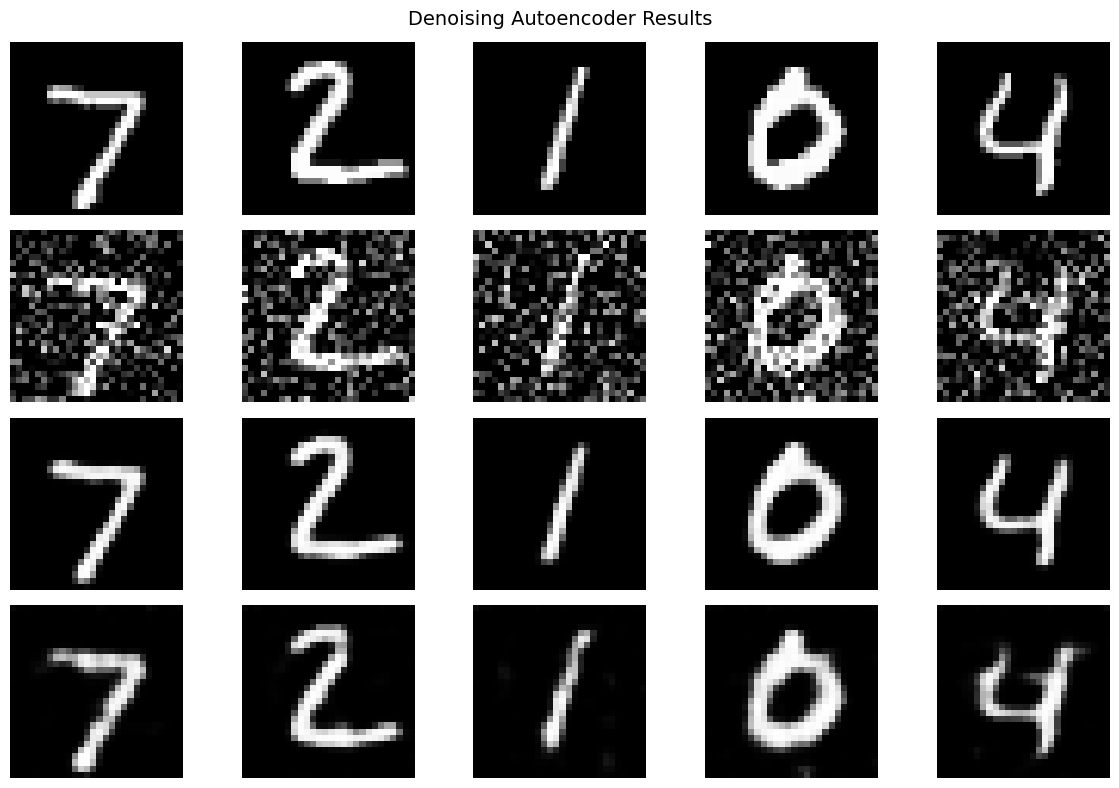

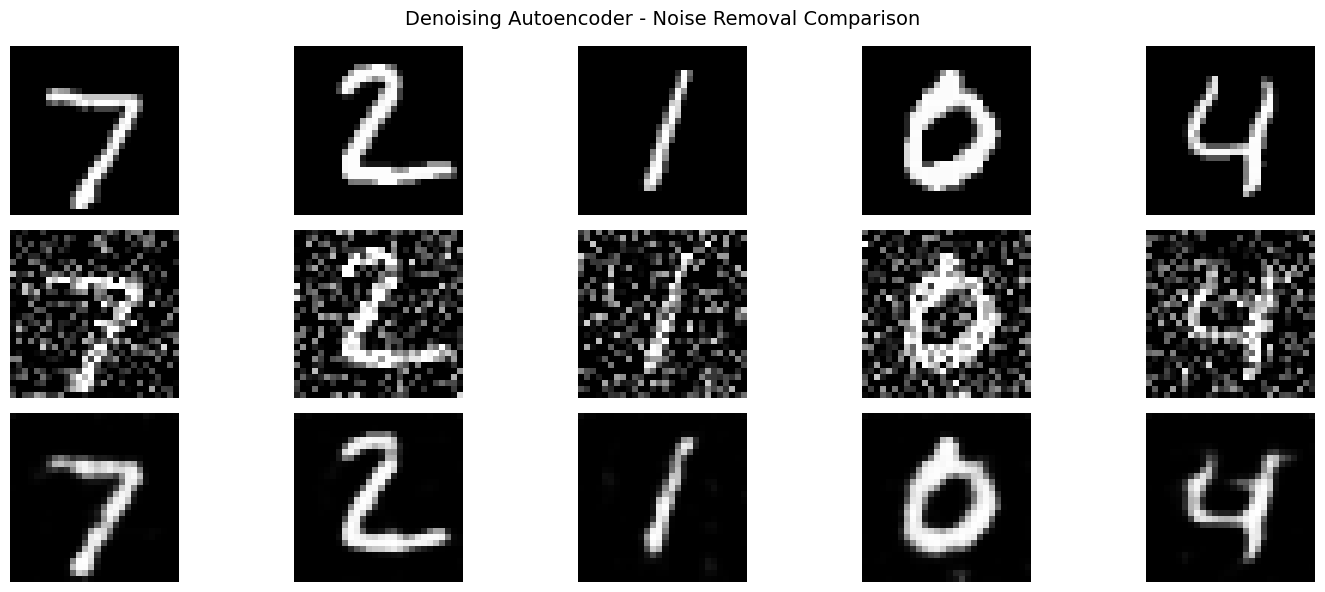


=== Training Complete ===


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.metrics import accuracy_score

np.random.seed(42)
tf.random.set_seed(42)

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

noise_factor = 0.35

x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, 0., 1.)

x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_test_noisy = tf.clip_by_value(x_test_noisy, 0., 1.)

print(f"Noisy train shape: {x_train_noisy.shape}")
print(f"Noisy test shape: {x_test_noisy.shape}")

class ConvAutoencoder(Model):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()

        self.encoder = Sequential([
            layers.Conv2D(8, (3,3), strides=2, padding='same', activation='relu', input_shape=(28,28,1)),
            layers.Conv2D(4, (3,3), strides=2, padding='same', activation='relu')
        ], name='encoder')

        self.decoder = Sequential([
            layers.Conv2DTranspose(4, (3,3), strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(8, (3,3), strides=2, padding='same', activation='relu'),
            layers.Conv2D(1, (3,3), padding='same', activation='sigmoid')
        ], name='decoder')

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

print("\n=== Training Standard Autoencoder ===")
autoencoder = ConvAutoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

_ = autoencoder(x_train[:1])
print("\nEncoder architecture:")
autoencoder.encoder.summary()
print("\nDecoder architecture:")
autoencoder.decoder.summary()

history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, x_test),
    verbose=2
)

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Standard Autoencoder Training', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Computing Reconstruction Errors ===")
x_train_pred = autoencoder.predict(x_train, verbose=0)
recon_error_train = np.mean((x_train - x_train_pred)**2, axis=(1,2,3))

threshold = recon_error_train.mean() + recon_error_train.std()
print(f"Training reconstruction error - Mean: {recon_error_train.mean():.6f}, Std: {recon_error_train.std():.6f}")
print(f"Threshold for anomaly detection: {threshold:.6f}")

x_test_pred = autoencoder.predict(x_test, verbose=0)
x_test_noisy_pred = autoencoder.predict(x_test_noisy, verbose=0)

recon_error_test = np.mean((x_test - x_test_pred)**2, axis=(1,2,3))
recon_error_test_noisy = np.mean((x_test_noisy - x_test_noisy_pred)**2, axis=(1,2,3))

print(f"Clean test reconstruction error - Mean: {recon_error_test.mean():.6f}")
print(f"Noisy test reconstruction error - Mean: {recon_error_test_noisy.mean():.6f}")

y_test_pred = (recon_error_test > threshold).astype(int)
y_test_noisy_pred = (recon_error_test_noisy > threshold).astype(int)

y_test_true = np.zeros(len(x_test))
y_test_noisy_true = np.ones(len(x_test_noisy))

acc_clean = accuracy_score(y_test_true, y_test_pred)
acc_noisy = accuracy_score(y_test_noisy_true, y_test_noisy_pred)

print("\n=== Standard Autoencoder Results ===")
print(f"Accuracy on original test images (should be normal): {acc_clean:.4f}")
print(f"Accuracy on noisy test images (should be anomalies): {acc_noisy:.4f}")
print(f"Overall accuracy: {(acc_clean + acc_noisy) / 2:.4f}")

n = 5
plt.figure(figsize=(12,8))

for i in range(n):
    ax = plt.subplot(4, n, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Original", fontsize=12)

    ax = plt.subplot(4, n, i+1+n)
    plt.imshow(x_test_noisy[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Noisy", fontsize=12)

    ax = plt.subplot(4, n, i+1+2*n)
    plt.imshow(x_test_pred[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Reconstructed\nOriginal", fontsize=12)

    ax = plt.subplot(4, n, i+1+3*n)
    plt.imshow(x_test_noisy_pred[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Reconstructed\nNoisy", fontsize=12)

plt.suptitle("Standard Autoencoder Results", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print("\n=== Training Denoising Autoencoder ===")
denoise_autoencoder = ConvAutoencoder()
denoise_autoencoder.compile(optimizer='adam', loss='mse')

history_denoise = denoise_autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_noisy, x_test),
    verbose=2
)

plt.figure(figsize=(10,6))
plt.plot(history_denoise.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history_denoise.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Denoising Autoencoder Training', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

x_test_denoise_pred = denoise_autoencoder.predict(x_test, verbose=0)
x_test_noisy_denoise_pred = denoise_autoencoder.predict(x_test_noisy, verbose=0)

plt.figure(figsize=(12,8))

for i in range(n):
    ax = plt.subplot(4, n, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Original", fontsize=12)

    ax = plt.subplot(4, n, i+1+n)
    plt.imshow(x_test_noisy[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Noisy", fontsize=12)

    ax = plt.subplot(4, n, i+1+2*n)
    plt.imshow(x_test_denoise_pred[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Denoised\nOriginal", fontsize=12)

    ax = plt.subplot(4, n, i+1+3*n)
    plt.imshow(x_test_noisy_denoise_pred[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Denoised\nNoisy", fontsize=12)

plt.suptitle("Denoising Autoencoder Results", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
for i in range(n):
    plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Original", fontsize=12)

    plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Noisy Input", fontsize=12)

    plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_test_noisy_denoise_pred[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i==0: plt.ylabel("Denoised Output", fontsize=12)

plt.suptitle("Denoising Autoencoder - Noise Removal Comparison", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print("\n=== Training Complete ===")